In [9]:
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dataset

In [10]:
dataset_path = Path("dataset/arabic_numerals")
number_class = 0

images = []
labels = []

for char in sorted(dataset_path.iterdir()):
    for number_image in sorted(char.iterdir()):
        if number_image.is_file() and number_image.suffix.lower() in ['.png', '.jpg', '.jpeg']:  # ตรวจสอบเฉพาะไฟล์ภาพ
            array_img = cv2.imread(str(number_image), cv2.IMREAD_GRAYSCALE)
            images.append(array_img)
            labels.append(number_class)
            #print(labels.append(number_class))
            #cls_name = file.split('_')[0]
    number_class += 1




In [11]:
X = np.array(images)
y = np.array(labels)

print(X.shape)
print(y.shape)

print(y[900])

(3330, 32, 32)
(3330,)
2


In [12]:
np.min(X), np.max(X)

(0, 255)

In [13]:
np.isnan(X).sum() # หา missing value

0

In [14]:
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


# Visualization

In [15]:
X[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

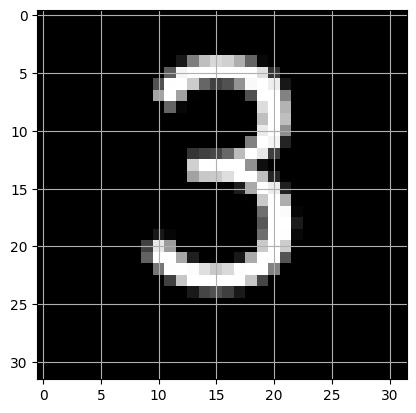

3

In [17]:
import matplotlib.pyplot as plt

idx = 999
img = X[idx]                  # image at index
plt.imshow(img, cmap=plt.cm.gray_r) # actutal BG is black (invert)
#plt.imshow(img, cmap=plt.cm.gray)  

plt.grid() 
plt.show()

y[idx] # class (เลขอะไร)

TypeError: Invalid shape (1,) for image data

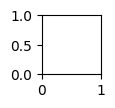

In [16]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(9, 5))
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(X=[i+j], cmap=plt.cm.gray_r)
        plt.title(y[i+j])
    
    plt.show()

visual_multi(0) # ตัวเริ่มจากเลขอะไร

## Train-test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

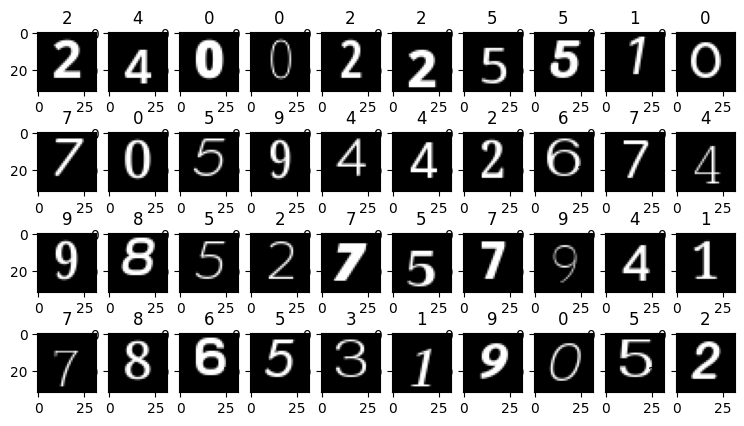

In [19]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(9, 5))
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)
        plt.title(y_train[i+j])
    
    plt.show()

visual_multi(0) # ตัวเริ่มจากเลขอะไร

In [20]:
print(X_train.shape)
print(X_test.shape)

(2664, 32, 32)
(666, 32, 32)


## Prepare Dataset (Re-shape the Structure)

In [21]:
X_train = np.expand_dims(X_train, -1)     # run only Once! or  np.squeeze(X_train)
X_test = np.expand_dims(X_test, -1)

In [22]:
# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [23]:
# Normalize Check
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [15]:
# Select samples
'''
num_samples = 3500         # number of samples to train and also num to test

X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

X_test = X_test[:num_samples]
y_test = y_test[:num_samples]
'''

'\nnum_samples = 3500         # number of samples to train and also num to test\n\nX_train = X_train[:num_samples]\ny_train = y_train[:num_samples]\n\nX_test = X_test[:num_samples]\ny_test = y_test[:num_samples]\n'

In [24]:
X_train.shape

(2664, 32, 32, 1)

In [25]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(2664, 32, 32, 1), y=(2664,)
Test: X=(666, 32, 32, 1), y=(666,)


# Create Model

In [26]:
num_classes = len(np.unique(y_train))
num_classes

10

In [27]:
in_shape = X_train.shape[1:]
in_shape

(32, 32, 1)

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten #, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu')) 

model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [30]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
import time
start = time.time()

history = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.15)

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
36/36 [==============================] - 4s 12ms/step - loss: 2.0638 - accuracy: 0.3388 - val_loss: 1.2387 - val_accuracy: 0.7650
Epoch 2/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.8485 - val_loss: 0.2635 - val_accuracy: 0.9350
Epoch 3/20
36/36 [==============================] - 0s 4ms/step - loss: 0.1877 - accuracy: 0.9567 - val_loss: 0.1246 - val_accuracy: 0.9750
Epoch 4/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0990 - accuracy: 0.9792 - val_loss: 0.1287 - val_accuracy: 0.9675
Epoch 5/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9854 - val_loss: 0.0440 - val_accuracy: 0.9875
Epoch 6/20
36/36 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9956 - val_loss: 0.0328 - val_accuracy: 0.9950
Epoch 7/20
36/36 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9978 - val_loss: 0.0197 - val_accuracy: 0.9950
Epoch 8/20
36/36 [=

In [33]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

21/21 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9985
Accuracy: 0.998


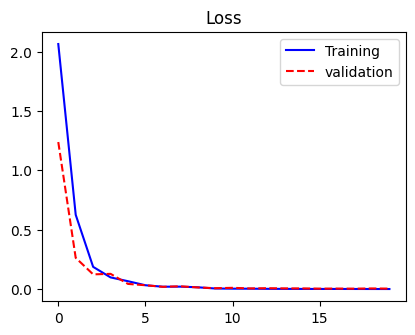

In [34]:
plt.figure(figsize=(4.7, 3.5))
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.title('Loss')
plt.legend()
plt.show()

## Predict X_test

In [35]:
y_pred = model.predict(X_test)
y_pred[:15].round(2)

21/21 [==============================] - 0s 2ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred_cls = np.argmax(y_pred, axis=1)
y_pred_cls[:15].round(2)

array([9, 1, 3, 3, 1, 4, 4, 5, 0, 4, 6, 0, 5, 3, 3], dtype=int64)

In [37]:
y_test[:15]  # actual class (real number) เลขจริง

array([9, 1, 3, 3, 1, 4, 4, 5, 0, 4, 6, 0, 5, 3, 3])

In [38]:
idx_miss = np.where(y_pred_cls != y_test)

print(len(idx_miss[0]))

1


In [39]:
print(idx_miss[0][:15]) 

[142]


In [40]:
y_test[idx_miss][:15] # actual class (real number) เลขจริง

array([3])

In [41]:
y_pred_cls[idx_miss][:15] # Predicted

array([4], dtype=int64)

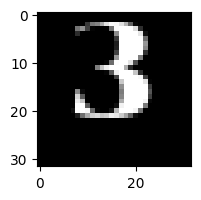

In [42]:
fig = plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_miss][0].reshape(32,32), cmap=plt.cm.gray_r)
plt.show()

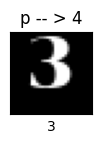

In [43]:
nplots = 16

fig = plt.figure(figsize=(10, 3.4))
for j,k in enumerate(idx_miss[0]):
    plt.subplot(2, 8, j+1)
    plt.imshow(X_test[k].reshape(32, 32), cmap=plt.cm.gray_r)
    plt.title('p -- > {}'.format(y_pred_cls[k]))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[k])
    if j >= nplots-1:
       break
#       plt.axis('off')
 
plt.show()

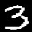

In [49]:
from fileinput import filename
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

filename = 'images/number/test_3_1.jpg'

img = load_img(filename, target_size=(32, 32))
img

In [50]:
from PIL import Image, ImageOps

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
print('max pixel value=',np.max(img))

img = img /255.0
print('max pixel value=',np.max(img))

img = np.expand_dims(img, axis=0)
img.shape

shape= (32, 32, 1)
max pixel value= 254.97452
max pixel value= 0.99990004


(1, 32, 32, 1)

In [51]:
y_pred = model.predict(img)

print(y_pred.round(3))

1/1 [==============================] - 0s 18ms/step
[[0.    0.    0.137 0.863 0.    0.    0.    0.    0.    0.   ]]


In [52]:
predicted = np.argmax(y_pred, -1)
print(predicted)

[3]


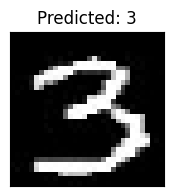

In [53]:
plt.figure(figsize=(2,2))
plt.imshow(img[0].reshape(32,32), cmap=plt.cm.gray_r)
plt.title('Predicted: {}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()